<a href="https://colab.research.google.com/github/priyankconnect/MyProjects/blob/main/machine_learning/Advanced_machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning is defined as
Machine learns with respect to a particular task T, performance matrix P following experience E, if the system reliably improves its performance P at task T following experience E.

Let T be a classification problem, eg. churn or no churn, buy or no buy

P can be overall accuracy, sensitivity, specificity and AUC

E is different classifiers generated by ML algorithms

In supervised learning, the algo learns using a function called loss funciton which is a function of predicted output and desired output.

We use optimization techniques to minimize this loss function. Most widely used optimization technique is called gradient descent.

### Developing a Gradient Descent Algorithm for Linear Regression Model

For predicting future sales using spends on different advertisement channels, we can build a regression model

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sales_df = pd.read_csv('https://raw.githubusercontent.com/manaranjanp/MLUsingPythonBook/main/data/Advertising.csv')
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Set X and Y variables

In [ ]:
X = sales_df[['TV','Radio','Newspaper']]
Y = sales_df['Sales']

### Standardize X and Y

In [ ]:
Y = np.array((Y-Y.mean())/Y.std())
X = X.apply(lambda x:(x-x.mean())/x.std(),axis =0)

### Implementing the Gradient Descent Algorithm

### Step 1: Random Initialization of the Bias and Weights

It takes the number of weights that need to be initialized as a parameter

In [ ]:
from numpy.random.mtrand import random
import random

# dim - is the number of weights to be initialized besides the bias
def initialize(dim):
  # For reproducible results, the seed is set to 42.
  np.random.seed(seed=42)
  random.seed(42)
  # initialize the bias
  b = random.random()
  # initialize the weights
  w = np.random.rand(dim)

  return b,w

To initialize the bias and 3 weights, as we have three input variables TV, radio and Newspaper

In [ ]:
b,w = initialize(3)
print("Bias:",b,"Weights:",w)

Bias: 0.6394267984578837 Weights: [0.37454012 0.95071431 0.73199394]


### Step 2: Predict Y values from the Bias and Weights

Calculate the value of Y for all the inputs, given the bias and weights.

We'll use matrix multiplication of weights with input variable values.

matmul() method in numpy library can be used for matrix multiplication.

Each row of X can be multiplied with the weights column to produce the predicted variable

In [ ]:
# Inputs:
# b- bias
# w- weights
# X - the input matrix

def predict_Y(b,w,X):
  return b + np.matmul(X,w)

Now Lets calculate the predicted values after initializing bias and weights

In [ ]:
b,w = initialize(3)
Y_hat = np.array(predict_Y(b,w,X))
Y_hat[0:10]

array([ 3.23149557,  1.70784873,  2.82476076,  2.75309026,  0.92448558,
        3.17136498,  0.62234399, -0.34935444, -2.313095  , -0.76802983])

### Step 3: Calculate the Cost Function; MSE

Compute mean squared error ( MSE) by
1. Calculating difference between the estimated Y hat and actual Y
2. Calculating the square of the above residuals, and sum over all records.
3. Dividing it with the number of observations:

In [ ]:
import math

# Inputs
# Y - Actual value of y
# Y_hat - predicted value of y
def get_cost(Y,Y_hat):
  # calculating the residuals- difference between actual and predicted values
  Y_resid = Y - Y_hat
  # matrix multiplication by self will give the squre values
  # then take the sum and divide by number of examples to
  # calculate mean
  return np.sum(np.matmul(Y_resid.T,Y_resid))/len(Y_resid)

In [ ]:
b,w = initialize(3)
Y_hat = predict_Y(b,w,X)
get_cost(Y,Y_hat)

1.53031001985059

### Step 4: Update the Bias and Weights

1. x,y: the input and output variables
2. y_hat: predicted value with current bias and weights
3. b_0,w_0: Current bias and weights
4. Learning rate to adjust the update step

In [ ]:
def update_beta(x,y,y_hat,b_0,w_0,learning_rate):
  # gradient of bias
  db = (np.sum(y_hat-y)*2)/len(y)
  # gradient of Weights
  dw = (np.dot((y_hat-y),x)*2)/len(y)
  # update bias
  b_1 = b_0 - learning_rate*db
  # update beta
  w_1= w_0 - learning_rate *dw

  # return the new bias and beta values
  return b_1,w_1

In [ ]:
b,w = initialize(3)
print("After Initialization-Bias: ",b," Weights: ",w)
Y_hat = predict_Y(b,w,X)
b,w = update_beta(X,Y,Y_hat,b,w,0.01)
print("After first update-Bias: ",b," Weights: ",w)

After Initialization-Bias:  0.6394267984578837  Weights:  [0.37454012 0.95071431 0.73199394]
After first update-Bias:  0.6266382624887261  Weights:  [0.38079093 0.9376953  0.71484883]


### Finding the Optimal Bias and Weights

The updates to the bias and weights need to be done iteratively, until the cost is minimum. It can take several iterations and is time-consuming. There are two approaches to stop the iterations:

1. Run a fixed number of iterations and use the bias and weights as optimal values at the end of these iterations.

2. Run iterations until the change in cost is small, that is, less than a predefined value ( eg. 0.001)

We will define a method run_gradient_descent(), which takes alpha and num_iterations as parameters and invokes methods like initialize(), predict_Y(), get_cost() and update_beta()

1. Variable gd_iterations_df keeps track of the cost every 10 iterations
2. default value of 0.01 for the learning parameter and 100 for number of iterations will be used.

In [ ]:
def run_gradient_descent( X,
                          Y,
                          alpha = 0.01,
                          num_iterations = 100):

    # Intialize the bias and weights
    b, w = initialize( X.shape[1] )

    iter_num = 0
    # gd_iterations_df keeps track of the cost every 10 iterations
    gd_iterations_df = pd.DataFrame(columns = ['iteration', 'cost'])
    result_idx = 0

    # Run the iterations in loop
    for each_iter in range(num_iterations):
        # Calcuated predicted value of y
        Y_hat = predict_Y( b, w, X )
        # Calculate the cost
        this_cost = get_cost( Y, Y_hat )
        # Save the previous bias and weights
        prev_b = b
        prev_w = w
        # Update and calculate the new values of bias and weights
        b, w = update_beta( X, Y, Y_hat, prev_b, prev_w, alpha)

        # For every 10 iterations, store the cost i.e. MSE
        if( iter_num % 10 == 0 ):
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx = result_idx + 1

        iter_num += 1

    print( "Final estimate of b and w: ", b, w )

    #return the final bias, weights and the cost at the end

    return gd_iterations_df, b, w

In [ ]:
gd_iterations_df, b, w = run_gradient_descent( X, Y, alpha = 0.001, num_iterations = 200 )

Final estimate of b and w:  0.4284489581739146 [0.48270238 0.75265969 0.46109174]


Lets take a printout of the cost at every 10 iterations

In [ ]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,1.530310
1,10.0,1.465201
2,20.0,1.403145
3,30.0,1.343996
4,40.0,1.287615
5,50.0,1.233868
6,60.0,1.182630
7,70.0,1.133780
8,80.0,1.087203
9,90.0,1.042793


### Plotting the Cost Function against the iterations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0, 0.5, 'Cost or MSE')

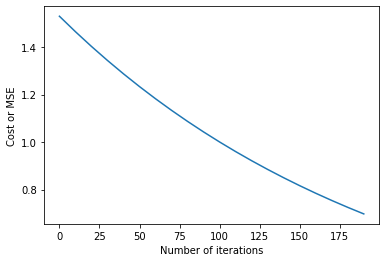

In [ ]:
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost']);
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

We can see that the cost is still reducing and has not reached the minimum point, we can run more iterations and verify if the cost is reaching a min. point or not

In [ ]:
print("Final estimates of b and w:",b,w)

Final estimates of b and w: 0.4284489581739146 [0.48270238 0.75265969 0.46109174]


The weights are standardized values, this means that for a one standard deviation change in say TV spend, the sales revenue changes by 0.48 sd and so on...


Lets run for more iterations and verify if the cost is reaching a min point or not

In [ ]:
alpha_df_1,b,w = run_gradient_descent(X,Y,alpha=0.01,
                                      num_iterations =2000)

Final estimate of b and w:  -4.125293727283968e-17 [ 0.75306591  0.53648155 -0.00433069]


What if we change the learning parameter and use a smaller value eg. 0.001

In [ ]:
alpha_df_2,b,w = run_gradient_descent(X,Y,alpha=0.001,
                                      num_iterations =2000)

Final estimate of b and w:  0.011664695556930216 [0.74315125 0.52779959 0.01171703]


Now we plot the cost after every iteration for different learning rate parameters ( alpha values)

Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

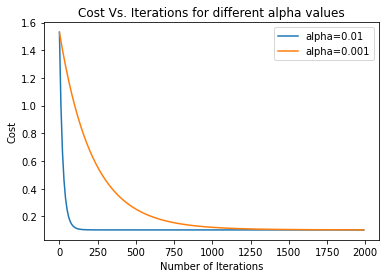

In [ ]:
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label='alpha=0.01');
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label = 'alpha=0.001');
plt.legend()
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')
plt.title('Cost Vs. Iterations for different alpha values')

We can use Sklearn to implement various algorithms. The steps are as follows:

1. Identify the features and outcome variables in the dataset
2. Split the dataset into training and test set
3. Build the model using training set
4. Predict outcome variable using a test set
5. Compare the predicted and actual values of the outcome variable in the test set and measure accuracy using accuracy measures such as MAPE or RMSE

### Splitting Dataset into Train and Test Datasets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    sales_df[["TV","Radio","Newspaper"]],
    sales_df.Sales, test_size = 0.3,
    random_state =42)

In [ ]:
len(X_train)

140

In [ ]:
len(X_test)

60

### Building Linear Regression Model with Train Dataset

Linear models are included in sklearn.linear_model module. We'll use and compare the results with our gradient descent algorithm

In [ ]:
from sklearn.linear_model import LinearRegression

Steps for building a model in sklearn are

1. Initialize the model

2. Invoke fit() method on the model and pass the input (X) and output (Y) values

2. fit() will run the algorithm and return the final estimated model parameters

In [ ]:
# Initializing the model
linreg = LinearRegression()
# Fitting training data to the model
linreg.fit(X_train, y_train)

LinearRegression()

After the model is built, the model parameters such as intercept(bias) and coefficients (weights) can be obtained using the following commands

In [ ]:
linreg.intercept_

2.7089490925159065

In [ ]:
linreg.coef_

array([0.04405928, 0.1992875 , 0.00688245])

To Associate the coefficient values with the variable names, we can use zip() in Python. zip() returns a dictionary with variable names mapped to coefficient values.

In [ ]:
list(zip(["TV","Radio","Newspaper"],list(linreg.coef_)))

[('TV', 0.04405928095746522),
 ('Radio', 0.19928749689893954),
 ('Newspaper', 0.006882452222275487)]

The weights are different than what we estimated earlier. This is because we have not standardized the values in this model. The model indicates that for evry unit change in TV spending, there is an increase of 0.044 units in sales revenue.

### Making Prediction on Test Set

In [ ]:
# predicting the y values from the test set
y_pred = linreg.predict(X_test)

Lets create and store these values in a DataFrame


In [ ]:
# Creating DataFrame with 3 columns named: actual,predicted and residuals
# to store the respective values
test_pred_df = pd.DataFrame({'actual': y_test,
                             'predicted':np.round(y_pred,2),
                             'residuals':y_test-y_pred})
# randomly showing the 10 observations from the DataFrame
test_pred_df.sample(10)

,actual,predicted,residuals
126,6.6,11.15,-4.553147
170,8.4,7.35,1.049715
95,16.9,16.57,0.334604
195,7.6,5.22,2.375645
115,12.6,13.36,-0.755569
38,10.1,10.17,-0.070454
56,5.5,8.92,-3.415494
165,11.9,14.30,-2.402060
173,11.7,11.63,0.068431
9,10.6,12.18,-1.576049


### Measuring Accuracy

We use RMSE and R-squared as two key accuracy measures for Linear Regression Models

In [ ]:
# Importing metrics from sklearn
from sklearn import metrics

### R-Squared Value

It is the amount of variance in Y that can be explained by the model.

In [ ]:
#y_train contains the actual value and the predicted value is
# returned from predict() method after passing the X values of the
# training data
r2 = metrics.r2_score(y_train, linreg.predict(X_train))
print("R Squared:",r2)

R Squared: 0.9055159502227753


The model explains 90% of the variance in Y

### RMSE Calculation

We use Mean squared error to calculate

In [ ]:
# y_pred contains predicted value of test data
mse = metrics.mean_squared_error(y_test, y_pred)

RMSE value can be calculated by the square root of mse

In [ ]:
# Taking square root of MSE and then round off to two decimal values
rmse = round(np.sqrt(mse),2)
print("RMSE:",rmse)

RMSE: 1.95


The RMSE value indicate that the model prediction has a standard deviation of 1.95

To understand the model error in detail, we need to understand the components of the error terms and how to deal with those components for improving model performance.


### Bias-Variance Trade Off

Model errors can be decomposed into two components:Bias and Variance. High Bias leads to underfitting model whereas variance can lead to overfitting model.

In below data y depends on x

In [ ]:
curve = pd.read_csv("https://raw.githubusercontent.com/manaranjanp/MLUsingPythonBook/main/data/curve.csv")
curve.head()

,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770


We can observe their relationship using scatterplot

Text(0, 0.5, 'y values')

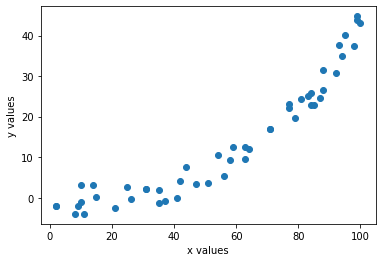

In [ ]:
plt.scatter(curve.x,curve.y);
plt.xlabel("x values")
plt.ylabel("y values")

As can be observed, the relation between y and x is not linear and looks like some polynomial. But we ar not sure of the degree of the polynomial form. We need to try various polynomial forms of x and verify which model fits the data best.

To explore various polynomial forms, polyfit() from numpy library can be used. It takes X and Y values, and the degree of x features to be used to fit a model. Degree 1 means only value of x is used to predict y, whereas degree 2 means x and x^2 are used to predict y.

This generic function takes degree as a parametre and builds a model

In [ ]:
# Input
# degree - polynomial terms to be used in the model
def fit_poly(degree):
  # calling numpy method polyfit
  p = np.polyfit(curve.x,curve.y,deg= degree)
  curve['fit'] = np.polyval(p,curve.x)
  # draws the scatter plot
  sn.regplot(curve.x,curve.y,fit_reg=False)
  #plot line between the x value and the fitted model
  return plt.plot(curve.x,curve.fit,label='fit')

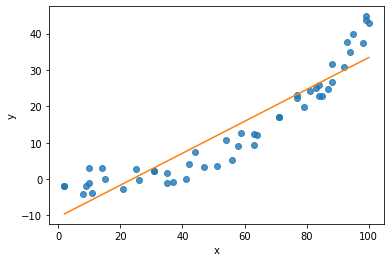

In [ ]:
fit_poly(1);
## plotting the model form and the data
plt.xlabel = ("x values")
plt.ylabel = ("y values");

The line does not seem to fit the data well. This is underfitting or bias. Lets try to fit higher degree

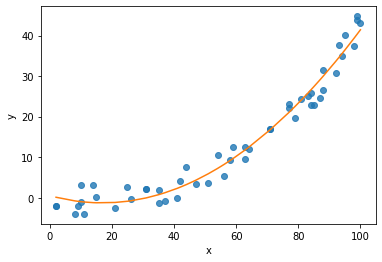

In [ ]:
fit_poly(2);
## plotting the model form and the data
plt.xlabel = ("x values")
plt.ylabel = ("y values");

It seems to fit better than the previous model. Lets increase the degree to 10.

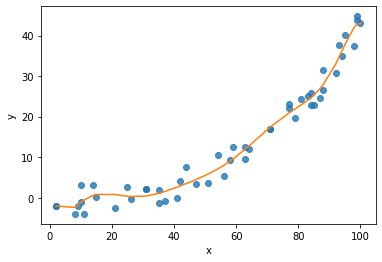

In [ ]:
fit_poly(10);
## plotting the model form and the data
plt.xlabel = ("x values")
plt.ylabel = ("y values");

Her model seems to fit every data. This is a case of overfitting. To see which is optimum, it will be done by comparing RMSE in training and test series.

We create a Dataframe named remse_df. We use the ofllowing code to build models with degrees ranging from 1 to 15 and storing the degree and errors details in different column. rmse_train: RMSE error on train set, rmse_test: RMSE error on the test set

In [ ]:
# Split the dataset into 60:40 into training and test set
train_X, test_X, train_y, test_y = train_test_split(curve.x,curve.y,test_size = 0.40, random_state=100)
# define the dataframe store degree and rmse for training and test set
rmse_df = pd.DataFrame(columns = ["degree","rmse_train","rmse_test"])
# Define a method to return the rmse given actual and predicted values.
def get_rmse(y,y_fit):
  return np.sqrt(metrics.mean_squared_error(y,y_fit))

# Iterate from degree 1 to 15
for i in range(1,15):
  # fitting model
  p = np.polyfit(train_X,train_y,deg = i)
  # storing model degree and rmse on train and test set
  rmse_df.loc[i-1] = [i,
                      get_rmse(train_y,np.polyval(p,train_X)),
                      get_rmse(test_y,np.polyval(p,test_X))]
rmse_df

,degree,rmse_train,rmse_test
0,1.0,5.226638,5.779652
1,2.0,2.394509,2.755286
2,3.0,2.233547,2.560184
3,4.0,2.231998,2.549205
4,5.0,2.197528,2.428728
5,6.0,2.062201,2.703880
6,7.0,2.039408,2.909237
7,8.0,1.995852,3.270892
8,9.0,1.979322,3.120420
9,10.0,1.976326,3.115875


Now we can plot the train and test errors against the degree of the models for better understanding

In [ ]:
 import matplotlib.pyplot as plt
 from importlib import reload
 plt=reload(plt)

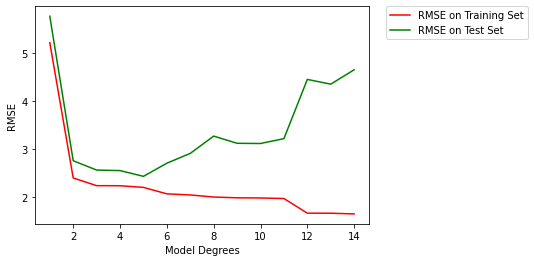

In [ ]:
# Plotting the mrse for training set in red color
plt.plot(rmse_df.degree,
         rmse_df.rmse_train,
         label = 'RMSE on Training Set',
         color = 'r')
# Plotting the rmse for test set in green color
plt.plot(rmse_df.degree,
         rmse_df.rmse_test,
         label = 'RMSE on Test Set',
         color = 'g')
# Mention the legend
plt.legend(bbox_to_anchor = (1.05,1),
           loc =2,
           borderaxespad = 0.);
plt.xlabel("Model Degrees")
plt.ylabel('RMSE');

As can be seen that the optimal model complexity is 5 which has low bias and low variance

### K Fold Cross Validation

K fold cross validation is a robust validation approach that can be adopted to verify if the model is overfitting.


### Advanced Regression Models

lets build a linear regression model to understand the shortcomings and then proceed to advanced regression models

This model will predict the SOLD PRICE of a player based on past performance measures of players

In [ ]:
ipl_auction_df = pd.read_csv('https://raw.githubusercontent.com/manaranjanp/MLUsingPythonBook/main/data/IPL%20IMB381IPL2013.csv')
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

We will use only a subset of features for building the model

In [ ]:
ipl_auction_df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [ ]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

Out of these there are four categorical features that need to be encoded into dummy features using OHE.

In [ ]:
# Initialize a list with the categorical feature names.
categorical_features = ['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']
#get_dummies() is invoked to return the dummy features.
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features],
                                        columns = categorical_features,
                                        drop_first = True)

In [ ]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

These will be our X variables, now we create both X and Y variables

In [ ]:
X = ipl_auction_encoded_df
Y = ipl_auction_df['SOLD PRICE']

Now we standardize both X and y, which is done by subtracting meand from the values and dividing by the standard deviaiton of the feature or variable.

StandardScaler available in sklearn.preprocessing package provides this functionality

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
## Initializing the StandardScaler
X_scaler = StandardScaler()
## Standardize all the feature columns
X_scaled = X_scaler.fit_transform(X)

## Standardizing Y explicitly by subtracting mean and
## dividing by standard deviation
Y = (Y-Y.mean())/Y.std()

In [ ]:
Y.shape

(130,)

### Split the Dataset into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    Y,
    test_size = 0.2,
    random_state = 42
)

### Build the Model

SGDRegressor in sklearn.linear_model is a variation of gradient descent algorithm for building linear regression model. Gradient descent algorithm uses all the training examples to learn to minimize the cost function, whereas the SGDRegressor ( Stochastic Gradient Descent) uses a subset of examples in each iteration for learning.

sklearn.linear_model also provides LinearRegression to build a linera regression model. We can initialize the LinearRegression clas and then call fit() and pass X_train and y_train to build the model.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
linreg.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

The sin of the coefficients indicates positive or negative effect on a player's SOLD PRICE. We will store the beta coefficients and respective coumns names in a DataFrame and then sort the coefficient values in descending order to observe the effects

In [ ]:
## The dataframes has two columns to store feature name and the corresponding coefficient values
columns_coef_df = pd.DataFrame({'columns': ipl_auction_encoded_df.columns,
                                'coef':linreg.coef_})

In [ ]:
# Sorting the features by coefficient values in descending order
sorted_coef_vals = columns_coef_df.sort_values('coef',ascending=False)

### Plotting the coefficient Valus

The vertical axis is the feature name and the horizontal axis is the coefficient value. As the features are standardized, the magnitude of the values also indicates the effect on outcome i.e. SOLD PRICE

Text(0, 0.5, 'Features')

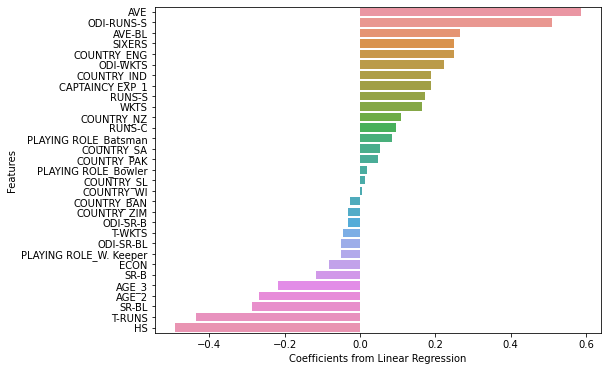

In [ ]:
plt.figure(figsize = (8,6)) ## Creating a bar plot
sn.barplot(x='coef',y = 'columns',data=sorted_coef_vals)
plt.xlabel('Coefficients from Linear Regression')
plt.ylabel('Features')

1. ABE, ODI-RUNS, SIXERS are top three highly influential features which determine the player's sold price

2. Highest Test runs and HS highest score has a negative influence. This can be due to multi collinearity.

We can calculate the RMSE on training and test sets to understand the model's ability to predict SOLD PRICE

In [ ]:
from sklearn import metrics
# takes a model as a parameter
# prints the RMSE on train and test set
def get_train_test_rmse(model):
  # predicting on training dataset
  y_train_pred = model.predict(X_train)
  # compare the actual y with predicted y in the training dataset
  rmse_train = round(np.sqrt(metrics.mean_squared_error(y_train,
                                                        y_train_pred)),3)
  # predicting on test dataset
  y_test_pred = model.predict(X_test)
  # Compare the actual y with predicted y in the test dataset
  rmse_test = round(np.sqrt(metrics.mean_squared_error(y_test,
                                                       y_test_pred)),3)
  print("train: ",rmse_train, " test:",rmse_test)

In [ ]:
get_train_test_rmse(linreg)

train:  0.679  test: 0.749


In this case train and test accuracy are pretty similar, hence it is a good model. If there are large difference...means ...value of train accuracy is higher...it indicates that the model is overfitting.

Most widely used approach to deal with model overfitting is called regularization which we are going to discuss next

### Applying Regularization

Regularization applies penalties on parameters if they inflate to large values and keeps them from being weighted too heavily.

The coefficients are penalized by adding the coefficient terms to the cost function. If the coefficients become large, the cost increases significantly.

So the optimizer controls the coefficient values to minimize the cost function.

There are two approaches

1. L1 Norm: Summation of the absolute value of the coefficients. This is also called LASSO ( Least Absolute shrinkage and Selection Operator)

2. L2 Norm: Summation of the squared value of the coefficients. this is also called RIDGE regression.

### Ridge Regression

sklearn.linear_model provides Ridge regression for applying L2 penalty. It takes the following parameters

1. alpha - Float- is the regularization strength, must be positive float. It reduces the variance of estimates. Large value of alpha imply stronger regularization.

2. max_iter- int(integer)- is the maximum number of interations for the gradient solver.

In [ ]:
#Importing Ridge Regression
from sklearn.linear_model import Ridge

# Applying alpha = 1 and running the algorithms for maximum of 500 iterations
ridge = Ridge(alpha=1,max_iter=500)
ridge.fit(X_train,y_train)

Ridge(alpha=1, max_iter=500)

In [ ]:
get_train_test_rmse( ridge)

train:  0.68  test: 0.724


The difference in RMSE on train and test has reduced because of pentaly effect. Lets apply alpha = 2

In [ ]:
ridge = Ridge(alpha=2.0, max_iter = 1000)
ridge.fit(X_train, y_train)
get_train_test_rmse(ridge)

train:  0.682  test: 0.706


The difference is further reduced.

We need to caluclate the optimal value of alpha. There are several ways. sklearn.model_selection.GridSearchCV can help search for the optimal value.

### LASSO REGRESSION


In [ ]:
# importing LASSO Regression
from sklearn.linear_model import Lasso

# Applying alpha = 1 and running the algo for maximum of 500 iterations

lasso = Lasso(alpha = 0.01, max_iter=500)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=500)

In [ ]:
get_train_test_rmse(lasso)

train:  0.688  test: 0.698


The difference is further reduced.

Lasso Reduces some of the coefs to 0, which indicates that these features are not necessary for explaining the variance in the outcome variable

We'll store the features names, coefs in a DataFrame and then filter the features with 0 coeffs.

In [ ]:
## Storeing the feature names and coefficient values in the DataFrame
lasso_coef_df = pd.DataFrame({'columns': ipl_auction_encoded_df.columns,
                              'coef':lasso.coef_})
lasso_coef_df

,columns,coef
0,T-RUNS,-0.301242
1,T-WKTS,-0.000000
2,ODI-RUNS-S,0.413059
3,ODI-SR-B,-0.000000
4,ODI-WKTS,0.157779
5,ODI-SR-BL,-0.035893
6,RUNS-S,0.131827
7,HS,-0.352652
8,AVE,0.458135
9,SR-B,-0.083146


In [ ]:
## Filtering out Coefficients with zeros
lasso_coef_df[lasso_coef_df.coef==0]

,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
28,PLAYING ROLE_Bowler,0.0


The LASSO regression indicates that the features listed under "columns" are not influencing factors for predicting the SOLD PRICE as the respective coefficient are 0.0

### Elastic Net

EasticNet regression combines both L1 and L2 regularizations to build a regression model, while building Elastic Net regression model, both hyperparameters sigma (L2) and Gamma(L1) need to be set.

It takes the following two parameters:

alpha = sigma + gamma

l1_ratio: The elastic net mixing parameter, lies between 0 and 1
0 means l2 penalty, l1 meand l1 penalty

In [ ]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=1.01, l1_ratio=0.001, max_iter=500)
enet.fit(X_train,y_train)
get_train_test_rmse(enet)

train:  0.789  test: 0.665


Here the model performance is not improved. It has become worse.

In [ ]:
bank_df = pd.read_csv('https://raw.githubusercontent.com/manaranjanp/MLUsingPythonBook/main/data/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


### Imbalanced Dataset

One of the major problems in machine learning is imbalanced dataset.

A dataset is imbalanced when there is no equal representation of all classes in the data.

eg. in hte bank marketing dataset, the proportion of customers who responded to the telemarketing is approximately 11.5% and the remaining 88.5% did not repsond.

Thus the representation f two classes ( responded, did, not respond) in the dataset is not equal.

In the data, the subscribed column indicates whether or not the customer has opened (subscribed) a term deposit account withe the bank after the marketing campaign

yes: opened the account
no: the customer has not opened the account

We have to check the number of records in each class to understand the imbalance. A simple value_counts() on the column values will provide the answer. the following command can be used for counting the number of records in each column.

In [ ]:
bank_df.subscribed.value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

Here the data is quite imbalanced.

In such cases the model may not be able to learn and may be biased towards the class that is overrepresented.

Even if the model predicts that no customers will subscribe ( all negative), it will have an accuracy of more than 80%, this is called Accuracy Paradox.

But the objective of building a model here is to identify the customers who will subscribe to the term deposit( i.e. increase the number of True Positives)

One approach to deal with imbalanced dataset is bootstraping. It involves  resampling techniques such as upsampling and downsampling.

1. Upsampling: Increase the instances of under represented minority class by replicating the existing observations in the dataset. Sampling with replacement isused fo theis purpose and is also called oversampling.

2. Downsampling: Reduce the instances of over-represnted majority class by removing the existing observations from the dataset and is also called upsampling.

sklearn.utils has resample method to help with upsampling. It takes the three parameters

1. The original sample set

2. Replace: implements resampling with replacement. If false, all resampled examples will be unique.

3. n_samples: Number of samples to generate

In this case, the number of examples of yes cases will be increased to 2000



In [ ]:
## importing resample from *sklearn.utils* package

In [ ]:
from sklearn.utils import resample

# Separate the case of yes-subscribes and no-subscribes
bank_subscribed_no = bank_df[bank_df.subscribed=='no']
bank_subscribed_yes = bank_df[bank_df.subscribed=='yes']

## upsample the yes-subscribed cases
df_minority_upsampled = resample(bank_subscribed_yes,
                                 replace=True,
                                 n_samples = 2000)
# Combine majority class with upsampled minority class
new_bank_df = pd.concat([bank_subscribed_no,df_minority_upsampled])

After upsampling, the new_bank_df contains 4000 cases of subscribed =no and 2000 cases of subscribed = yes, in the ratio of 67:33.

Before using the dataset, the examples can be shuffled to make sure they are not in a particular order. sklearn. utils has a method shuffle() which does the shuffling.

In [ ]:
from sklearn. utils import shuffle
new_bank_df = shuffle(new_bank_df)

We now assign all the features colun names to X_features variable

In [ ]:
# Assigning list of all column names in the DataFrame
X_features = list(new_bank_df.columns)
# Remove the response variable from the list
X_features.remove('subscribed')
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

The follwoing command can be used to encode all the categorical features into dummy features and assign to X

In [ ]:
## get_dummies() will convert all the columns with data types as objects
encoded_bank_df = pd.get_dummies(new_bank_df[X_features],
                                 drop_first= True)
X = encoded_bank_df

Teh subscribed column values are string literals and need to be encoded as follows

1. Yes to 1
2. No to 0

In [ ]:
# Encoding the subscribed column and assigning to Y
Y = new_bank_df.subscribed.map(lambda x: int(x=='yes'))

lets split the dataset into train and test sets in 70:30 ratio, respectively

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size = 0.3,
                                                    random_state =42)